In [30]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace

In [62]:
conf = !python  parameters.py

In [63]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [64]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_ppo_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')


In [65]:
df

[[0,
  [7, 0, 0, 1, 6, 7, 1, 2, 4],
  [4.0, 6.0, 6.0, 2.0, 6.0, 4.0, 2.0, 4.0, 2.0],
  [15.0, 5.0, 5.0, 25.0, 15.0, 15.0, 25.0, 1.0, 15.0],
  [5.0, 5.0, 5.0, 20.0, 20.0, 5.0, 20.0, 1.0, 20.0]],
 [1,
  [5, 4, 2, 2, 7, 3, 5, 0, 2],
  [6.0, 4.0, 2.0, 2.0, 4.0, 2.0, 6.0, 4.0, 2.0],
  [1.0, 30.0, 15.0, 15.0, 30.0, 20.0, 1.0, 20.0, 15.0],
  [20.0, 20.0, 10.0, 10.0, 20.0, 1.0, 20.0, 5.0, 10.0]],
 [2,
  [7, 8, 5, 4, 0, 5, 0, 1, 4],
  [2.0, 4.0, 2.0, 6.0, 4.0, 2.0, 4.0, 6.0, 6.0],
  [20.0, 1.0, 25.0, 25.0, 25.0, 25.0, 25.0, 30.0, 25.0],
  [5.0, 10.0, 5.0, 15.0, 20.0, 5.0, 20.0, 15.0, 15.0]],
 [3,
  [8, 4, 1, 8, 2, 5, 4, 0, 0],
  [2.0, 6.0, 2.0, 2.0, 4.0, 4.0, 6.0, 4.0, 4.0],
  [30.0, 10.0, 10.0, 30.0, 5.0, 1.0, 10.0, 10.0, 10.0],
  [20.0, 15.0, 10.0, 20.0, 5.0, 20.0, 15.0, 1.0, 1.0]],
 [4,
  [9, 9, 1, 7, 2, 9, 9, 1, 1],
  [10.0, 10.0, 2.0, 4.0, 2.0, 10.0, 10.0, 2.0, 2.0],
  [30.0, 30.0, 1.0, 15.0, 15.0, 30.0, 30.0, 1.0, 1.0],
  [10.0, 10.0, 10.0, 15.0, 15.0, 10.0, 10.0, 10.0, 10.0]],
 [5,
  [6,

In [66]:
machines,speed, latency, cost = [],[],[],[]
for x in range(len(df)):
    machines.append(df[x][1])
    speed.append(df[x][2])
    latency.append(df[x][3])
    cost.append(df[x][4])
machines = np.array(machines)
speed = np.array(speed)
latency = np.array(latency)
cost = np.array(cost)
machines.shape


(120, 9)

In [67]:
print(len(speed))
print(speed[0])


120
[4. 6. 6. 2. 6. 4. 2. 4. 2.]


In [68]:
cost[:10]

array([[ 5.,  5.,  5., 20., 20.,  5., 20.,  1., 20.],
       [20., 20., 10., 10., 20.,  1., 20.,  5., 10.],
       [ 5., 10.,  5., 15., 20.,  5., 20., 15., 15.],
       [20., 15., 10., 20.,  5., 20., 15.,  1.,  1.],
       [10., 10., 10., 15., 15., 10., 10., 10., 10.],
       [ 5.,  1., 10., 10., 10.,  1., 15.,  1.,  5.],
       [20., 15., 20., 20.,  1., 15.,  5., 20., 15.],
       [ 5., 15.,  5.,  5.,  5.,  5., 20., 15.,  5.],
       [15., 15., 15., 15., 10., 15., 15., 10.,  5.],
       [10., 10.,  5.,  5., 15., 15., 10.,  5., 10.]])

In [69]:
cost_ticks=configs.cost_options
my_dict = {cost:e for e,cost in enumerate(cost_ticks)}
cst = np.vectorize(my_dict.get)(cost)
cst

array([[1, 1, 1, ..., 4, 0, 4],
       [4, 4, 2, ..., 4, 1, 2],
       [1, 2, 1, ..., 4, 3, 3],
       ...,
       [1, 0, 3, ..., 4, 2, 2],
       [2, 0, 3, ..., 2, 3, 2],
       [0, 2, 3, ..., 2, 0, 4]])

3
[1, 5, 10, 15, 20]


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_11772/4183560228.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


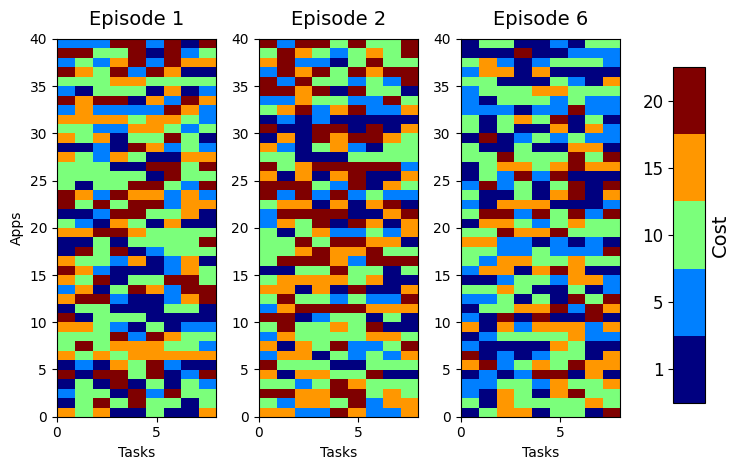

In [70]:

size = 40
nplots = len(cost)//size
print(nplots)
cost_ticks=configs.cost_options
print(cost_ticks)
n_latencies = len(cost_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',n_latencies)
bounds =  np.arange(0,n_latencies,1)

fig, axi = plt.subplots(1, nplots)
episode = configs.record_alloc_episodes
for e,n in enumerate(range(nplots)):
    im2 = axi[e].imshow(cst[e*size:(n*size)+size], extent=[0,8,0,40], aspect="auto", cmap=c)
    # axi[e].set_xticklabels([])
    # axi[e].set_xticks([0,5,8], [0,5,9])
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Episode %i'%(episode[e]+1),fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.06, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
cb.set_ticklabels(cost_ticks, fontsize=12)
cb.ax.set_ylabel('Cost',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
# plt.savefig("images/speed_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

### SPPED

In [71]:
speed_ticks=configs.cpu_speed_options
my_dict2 = {s:e+1 for e,s in enumerate(speed_ticks)}
my_dict2[10]=0 ## CLOUD
spd = np.vectorize(my_dict2.get)(speed)
spd


array([[2, 3, 3, ..., 1, 2, 1],
       [3, 2, 1, ..., 3, 2, 1],
       [1, 2, 1, ..., 2, 3, 3],
       ...,
       [3, 3, 3, ..., 1, 3, 3],
       [0, 3, 2, ..., 2, 2, 1],
       [3, 3, 1, ..., 3, 3, 1]])

3


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_11772/2837435694.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


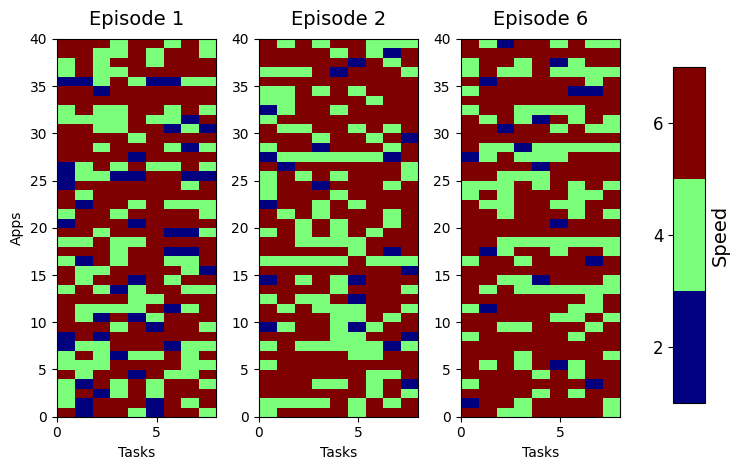

In [72]:

size = 40
nplots = len(speed)//size
print(nplots)
number = len(speed_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',number)
bounds =  np.arange(0,number,1)

fig, axi = plt.subplots(1, nplots)
episode = configs.record_alloc_episodes
for e,n in enumerate(range(nplots)):
    im2 = axi[e].imshow(spd[e*size:(n*size)+size], extent=[0,8,0,40], aspect="auto", cmap=c)
    # axi[e].set_xticklabels([])
    # axi[e].set_xticks([0,5,8], [0,5,9])
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Episode %i'%(episode[e]+1),fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.06, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/number)+(1/(number*2)))
cb.set_ticklabels(speed_ticks, fontsize=12)
cb.ax.set_ylabel('Speed',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
# plt.savefig("images/speed_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar3d'

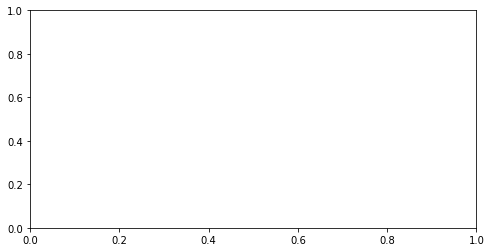

In [498]:
x = np.arange(spd.shape[0])
y = np.arange(spd.shape[1])
_xx, _yy = np.meshgrid(x, y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

fig, ax = plt.subplots(figsize=(8,4))
ax.bar3d(x, y, bottom, width, depth, top, shade=True)
plt.show()

In [474]:

latency_ticks=[1,5,10,15,20,30]
my_dict = {1:1, 5:2, 10:3, 15:4, 20:5,30:6}
lat = np.vectorize(my_dict.get)(latency)
lat
   

array([[5, 2, 2, ..., 2, 5, 5],
       [1, 2, 5, ..., 3, 5, 5],
       [2, 3, 2, ..., 5, 4, 6],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [475]:
lat.shape

(160, 9)

4
[1, 5, 10, 15, 20, 25]


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_17852/4197980563.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


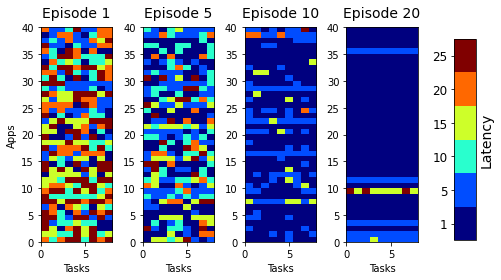

In [479]:

size = 40
nplots = len(lat)//size
print(nplots)
latency_ticks= [1,5,10,15,20,25]
print(latency_ticks)
n_latencies = len(latency_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',6)
bounds =  np.arange(0,n_latencies,1)

fig, axi = plt.subplots(1, nplots)
episode = [1,5,10,20]
for e,n in enumerate(range(nplots)):
    im2 = axi[e].imshow(lat[e*size:(n*size)+size], extent=[0,8,0,40], aspect="auto", cmap=c)
    # axi[e].set_xticklabels([])
    # axi[e].set_xticks([0,5,8], [0,5,9])
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Episode %i'%episode[e],fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.06, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
cb.set_ticklabels(latency_ticks, fontsize=12)
cb.ax.set_ylabel('Latency',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig("images/latency_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()


In [480]:
df = pd.read_pickle('trainlogs/log_alloc_c15_v2_train_9_99_3_20.pkl', 'infer')
machines,speed, latency = [],[],[]
for x in range(len(df)):
    machines.append(df[x][1])
    speed.append(df[x][2])
    latency.append(df[x][3])
machines = np.array(machines)
speed = np.array(speed)
latency = np.array(latency)
machines.shape

latency_options = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
my_dict = {1:1, 5:2, 10:3, 15:4, 20:5,25:6,30:6,35:7,40:8,45:9,50:10,55:11,60:11,65:12,70:13}
lat = np.vectorize(my_dict.get)(latency)
lat


array([[ 9,  9, 10, ..., 10,  4, 12],
       [ 4,  8,  3, ...,  6, 11, 13],
       [ 9,  3,  4, ...,  6,  4, 11],
       ...,
       [ 1,  1,  3, ...,  2,  2,  2],
       [ 3,  1,  1, ...,  1,  1,  1],
       [ 2,  1,  1, ...,  1,  2,  2]])

In [481]:
lat.shape

(160, 81)

4
[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
0 40
40 80
80 120
120 160


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_17852/2911610927.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


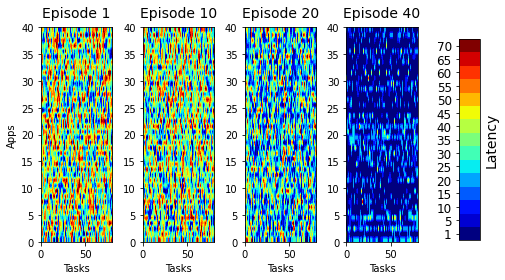

In [482]:

size = 40
nplots = len(lat)//size
print(nplots)
latency_ticks= [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
print(latency_ticks)
n_latencies = len(latency_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',n_latencies)
bounds =  np.arange(0,n_latencies,1)

fig, axi = plt.subplots(1, nplots)
episode = [1,10,20,40]
for e,n in enumerate(range(nplots)):
    print(e*size,(n*size)+size)
    im2 = axi[e].imshow(lat[e*size:(n*size)+size], extent=[0,80,0,40], aspect="auto",cmap=c)
    # axi[e].set_xticklabels([])
    # axi[e].set_xticks([0,5,8], [0,5,9])
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Episode %i'%episode[e],fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.07, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
cb.set_ticklabels(latency_ticks, fontsize=12)
cb.ax.set_ylabel('Latency',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig("images/latency_c15_99.pdf",dpi=300,bbox_inches = 'tight')

plt.show()


In [392]:
train_log = pd.read_pickle('trainlogs/log_ppo_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')
edge_log = pd.read_pickle('trainlogs/log_edge_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')
rnd_log = pd.read_pickle('trainlogs/log_rnd_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')
train_log = np.array(train_log)
edge_log = np.array(edge_log)
rnd_log = np.array(rnd_log)
print(train_log.shape)
train_log = np.abs(train_log)
rnd_log = np.abs(rnd_log)
edge_log = np.abs(edge_log)

print(train_log[:5])

(100, 4)
[[  0.         178.9037487   35.51129913  88.32000008]
 [  1.         168.30666656  31.57043457  79.42000055]
 [  2.         176.3354167   26.34950829  81.80500021]
 [  3.         143.5812499   25.81871796  81.31249952]
 [  4.         128.80750008  25.95491028  83.82499981]]


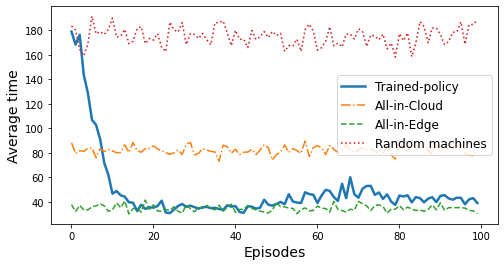

In [404]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log[:,1],linewidth=2.5,label="Trained-policy")
ax.plot(train_log[:,-1],linestyle="-.",label="All-in-Cloud")
ax.plot(edge_log[:,1],linewidth=1.5,linestyle="dashed",label="All-in-Edge")
ax.plot(rnd_log[:,1],linewidth=1.6,linestyle=":",label="Random machines")
# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [405]:
train_log99 = pd.read_pickle('trainlogs/log_ppo_train_3_99_3_20.pkl', 'infer')
train_log999 = pd.read_pickle('trainlogs/log_ppo_train_3_999_3_20.pkl', 'infer')
train_log99 = np.array(train_log99)
train_log999 = np.array(train_log999)
train_log999 = np.abs(train_log999)
train_log99 = np.abs(train_log99)


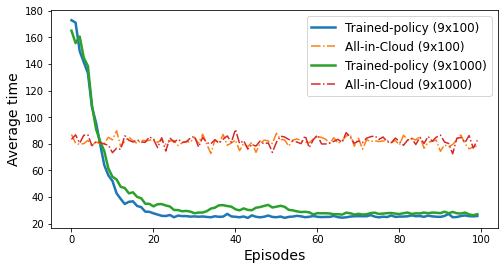

In [407]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log99[:,1],linewidth=2.5,label="Trained-policy (9x100)")
ax.plot(train_log99[:,-1],linestyle="-.",label="All-in-Cloud (9x100)")

ax.plot(train_log999[:,1],linewidth=2.5,label="Trained-policy (9x1000)")
ax.plot(train_log999[:,-1],linestyle="-.",label="All-in-Cloud (9x1000)")


# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [408]:
train_log99 = pd.read_pickle('trainlogs/log_ppo_train_9_99_3_20.pkl', 'infer')
train_log999 = pd.read_pickle('trainlogs/log_ppo_train_9_999_3_20.pkl', 'infer')
train_log99 = np.array(train_log99)
train_log999 = np.array(train_log999)
train_log999 = np.abs(train_log999)
train_log99 = np.abs(train_log99)

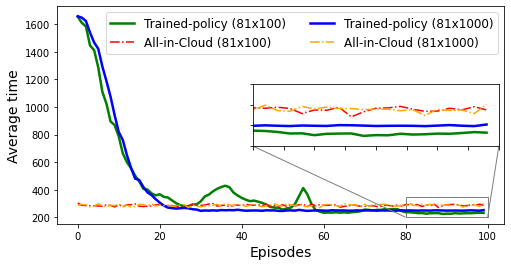

In [431]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
fig, ax = plt.subplots(figsize=(8,4))

axins1 = zoomed_inset_axes(ax, zoom = 3, loc='center right')
axins1.plot(train_log99[:,1],color='green',linewidth=2.5)
axins1.plot(train_log999[:,1],color='blue',linewidth=2.5)
axins1.plot(train_log99[:,-1],color='red',linestyle="-.")
axins1.plot(train_log999[:,-1],color='orange',linestyle="-.")
axins1.tick_params(labelleft=False, labelbottom=False)
#axins1.plot(y,datapts.T,'mo')
x1, x2, y1, y2 = 80,100,200,350 
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

ax.plot(train_log99[:,1],linewidth=2.5,label="Trained-policy (81x100)",color='green')
ax.plot(train_log99[:,-1],linestyle="-.",label="All-in-Cloud (81x100)",color='red')

ax.plot(train_log999[:,1],linewidth=2.5,label="Trained-policy (81x1000)",color='blue')
ax.plot(train_log999[:,-1],linestyle="-.",label="All-in-Cloud (81x1000)",color='orange')

mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="0.5")
# plt.legend(title='Allocations',fontsize=14)
ax.legend(fontsize=12,ncol=2)
# plt.title('Job times',fontsize=16)
ax.set_xlabel('Episodes', fontsize=14)
ax.set_ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_99-999_81.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

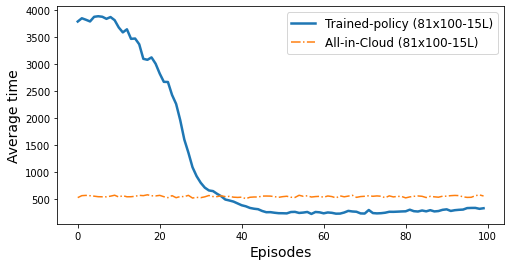

In [445]:
train_log15 = pd.read_pickle('trainlogs/log_ppo_c15_train_9_99_3_20.pkl', 'infer')
train_log15 = np.array(train_log15)
train_log15 = np.abs(train_log15)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log15[:,1],linewidth=2.5,label="Trained-policy (81x100-15L)")
ax.plot(train_log15[:,-1],linestyle="-.",label="All-in-Cloud (81x100-15L)")


# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_81_100_L15.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [78]:
train_log  = pd.read_pickle('logs/log_ppo_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')

In [84]:
train_log = np.array(train_log)
train_log[:5]

array([[   0.        , -167.98808426,   46.67331314,  -85.05274999,
          82.93249998,  200.35083008,   90.        ,   92.47499847],
       [   1.        , -158.89037508,   34.69121933,  -88.49149999,
          87.84499998,  181.91125488,   90.        ,  105.17500305],
       [   2.        , -132.41491785,   27.93808365,  -79.89374987,
          75.56249981,  153.23916626,   90.        ,   83.82499695],
       [   3.        , -114.31133335,   27.16951752,  -87.47649992,
          86.39499989,  129.64834595,   90.        ,   78.52500153],
       [   4.        , -112.81512576,   25.67551422,  -84.84100068,
          82.63000097,  124.92874908,   90.        ,   84.55000305]])

In [85]:
reward = train_log[:,1]
initTime = train_log[:,4]
Time = train_log[:,5]
initCost = train_log[:,6]
Cost = train_log[:,7]
meanV = train_log[:,2]

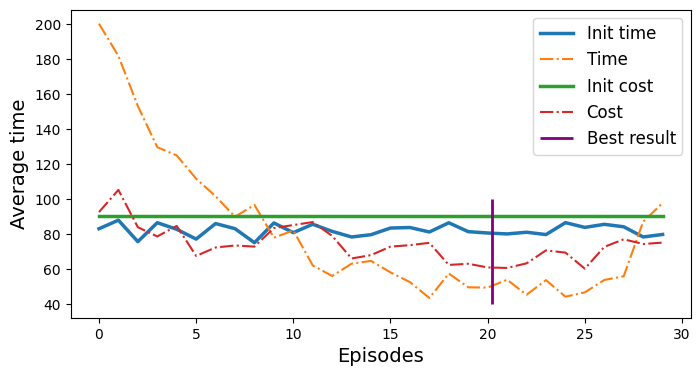

In [91]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(initTime,linewidth=2.5,label="Init time")
ax.plot(Time,linestyle="-.",label="Time")

ax.plot(initCost,linewidth=2.5,label="Init cost")
ax.plot(Cost,linestyle="-.",label="Cost")

vx = meanV.min()
ax.vlines(x=vx, ymin=40, ymax=100, colors='purple', ls='-', lw=2, label='Best result')
# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
# plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


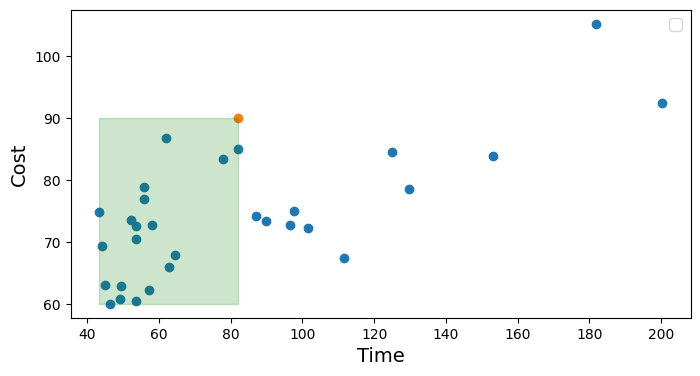

In [99]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(Time,Cost)
ax.scatter(initTime.mean(),initCost[0])

a = Time.min()
b = initTime.mean()
y_min = Cost.min()
y_max = initCost[0]
ax.fill([a, a, b, b], [y_min, y_max, y_max, y_min], color = 'green', alpha = 0.2)
vx = meanV.min()
# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Cost', fontsize=14)
# plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [100]:
dfGA = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
episode, time, cost, exec_time = [],[],[],[]
for x in range(len(dfGA)):
    episode.append(dfGA[x][0])
    time.append(dfGA[x][1])
    cost.append(dfGA[x][2])
    exec_time.append(dfGA[x][3])
episode = np.array(episode)
ftime = np.array(time)
fcost = np.array(cost)
exec_time = np.array(exec_time)


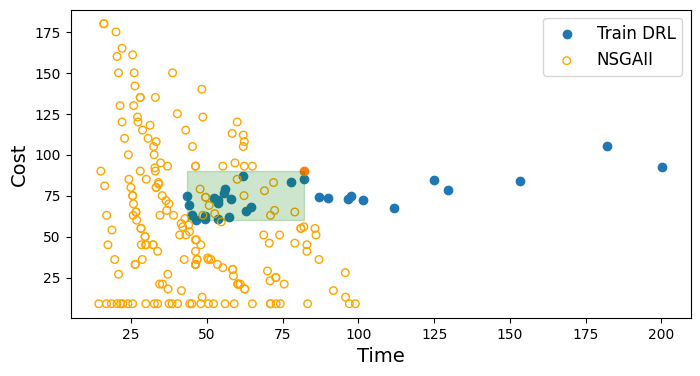

In [102]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(Time,Cost,label="Train DRL")
ax.scatter(ftime, fcost, s=30, facecolors='none', edgecolors='orange',label="NSGAII")
ax.scatter(initTime.mean(),initCost[0])

a = Time.min()
b = initTime.mean()
y_min = Cost.min()
y_max = initCost[0]
ax.fill([a, a, b, b], [y_min, y_max, y_max, y_min], color = 'green', alpha = 0.2)
vx = meanV.min()
# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Cost', fontsize=14)
# plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [116]:
ppoeval  = pd.read_pickle('logs/log_eval_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
ppoeval = np.array(ppoeval)

In [117]:
dfGA = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
episode, time, cost, exec_time = [],[],[],[]
for x in range(len(dfGA)):
    episode.append(dfGA[x][0])
    time.append(dfGA[x][1])
    cost.append(dfGA[x][2])
    exec_time.append(dfGA[x][3])
episode = np.array(episode)
exec_time = np.array(exec_time)
gatime = np.array(time)
gacost = np.array(cost)


In [118]:
times = ppoeval[:,1]
cost =  ppoeval[:,2]
print(times)
print(cost)

[ 57.5         78.75        27.25        30.75        35.33333588
  45.5         29.5         29.5         18.          33.75
  26.75        61.83333206  40.16666412 187.5         31.16666603
  49.75        20.83333397  19.66666603  15.66666603  26.16666603
  23.16666794  18.83333397  34.08333588  50.33333588  24.16666603
  20.16666603  22.83333206  17.5         33.          44.33333588
  17.5         34.33333588  27.16666794  22.25        55.
  18.16666603  80.33333588  54.33333206  51.5         49.75
 125.96666718  32.5         28.16666794  27.58333206  31.5
  20.83333397  56.33333206  57.25        34.41666412  18.16666603
  75.          24.66666603  30.5         33.25        16.75
  38.41666412  39.          25.75       126.40000916  28.58333397
  42.5         30.66666603  32.16666412  18.16666794  91.25
  42.66666412  33.          37.          20.16666794  97.70000458
  40.99999619  19.33333397 162.5         49.          41.33333588
  20.83333206  23.49999809  28.16666794  26.5    

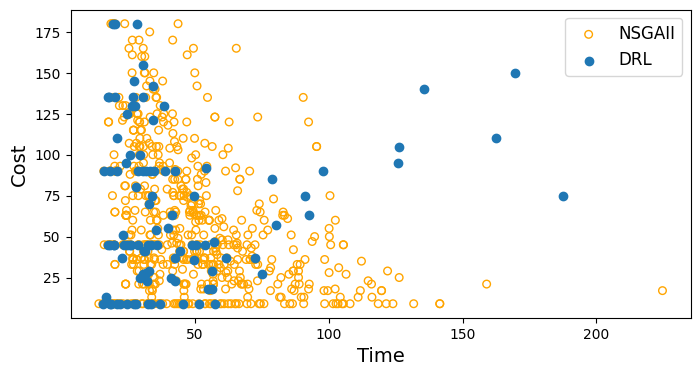

In [120]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(gatime, gacost, s=30, facecolors='none', edgecolors='orange',label="NSGAII")
ax.scatter(times,cost,label="DRL")


# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Cost', fontsize=14)
# plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()